### Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
c_data = pd.read_csv('../data/data.csv')

## 1. Inspecting the Data
#### 1.1 Overview of the file
Observing info section below, we can see that:
- All features are numeric
- 93 of the features are type 'float' and 3 are 'int'

In [4]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
c_data.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


#### 1.2 Checking for missing values
Utilzing missigno matrix for quick visuualization of any patterns of NaN values in the dataset.       

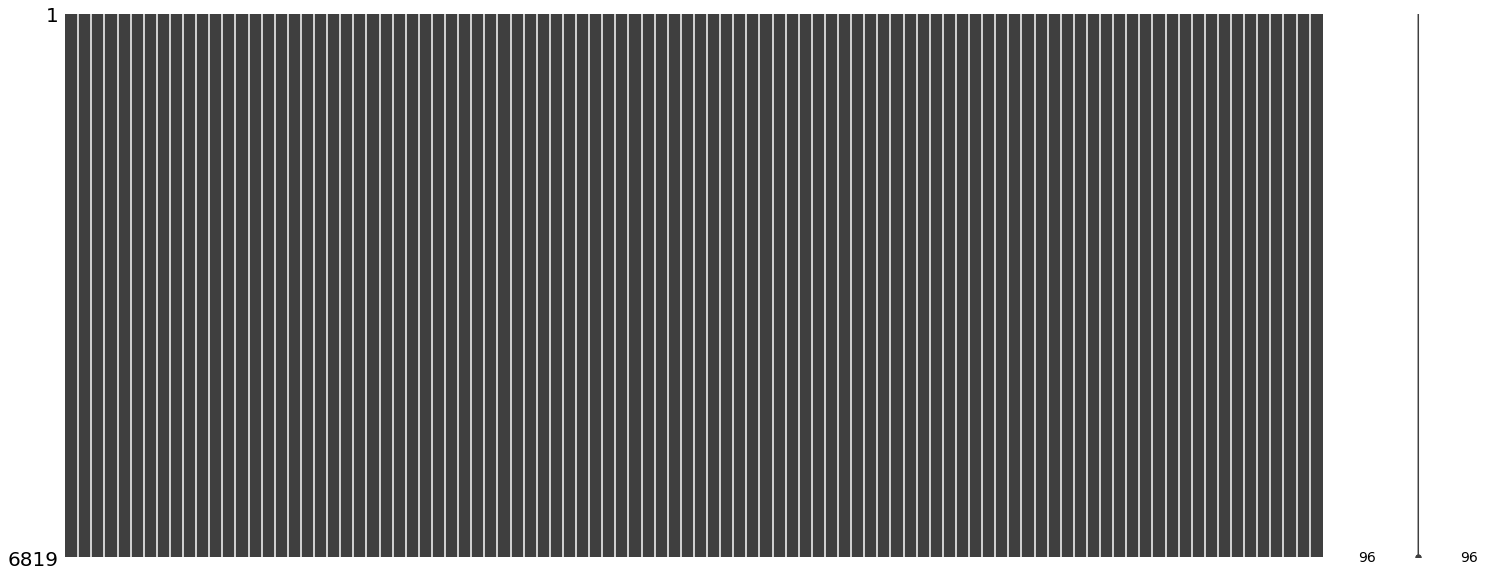

In [6]:
msno.matrix(c_data)
plt.show()

The above matrix does not show any patterns of missingness in the dataset.
For better visualization and validation I also created heatmap to visualize the location of the missing values.

<AxesSubplot:>

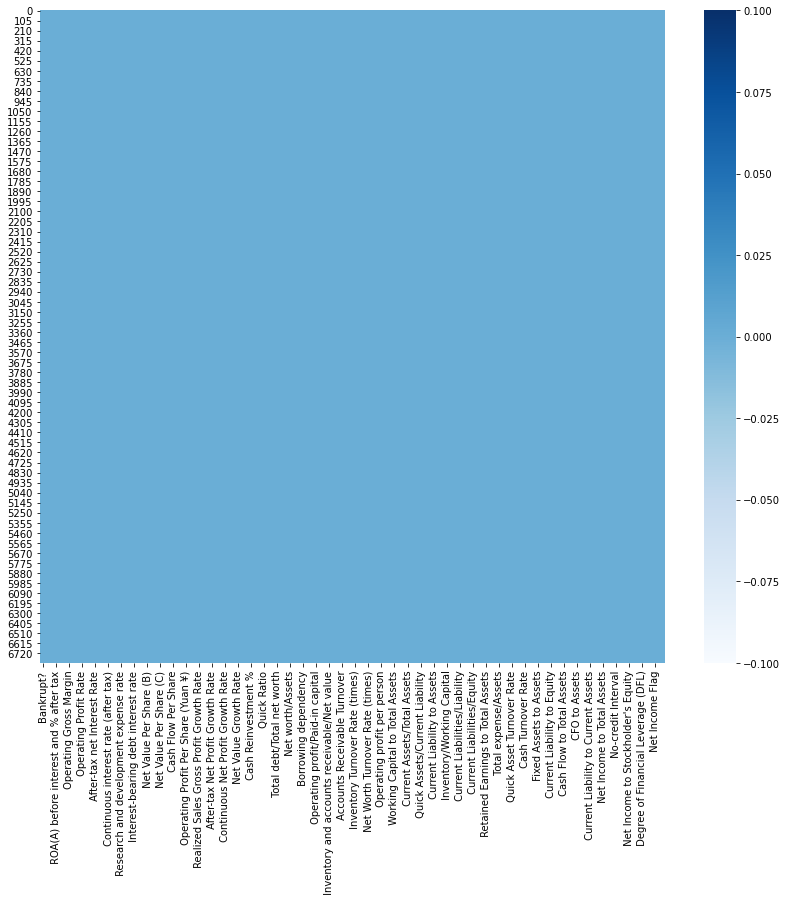

In [7]:
plt.figure(figsize=(14,12))
sns.heatmap(c_data.isnull(), cmap ='Blues')

By observing both NaN value indicators, we can confirm that there are no occurrence of missing or null values in the dataset.

#### 1.2 Inspection of Columns and cleaning
By visualizing the Columns sections, we can see that the there are leading white spaces infront of the column names

In [8]:
c_data.columns[:5]

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin'],
      dtype='object')

First to strip the leading white space and replace all spaces between strings to underscore

In [9]:
c_data.columns = c_data.columns.str.strip()
c_data.columns = c_data.columns.str.replace(" ","_")
c_data.columns[:5]

Index(['Bankrupt?', 'ROA(C)_before_interest_and_depreciation_before_interest',
       'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin'],
      dtype='object')

In the info section we observed that there are 3 'int' type columns:
1. Bankrupt?
2. Liability-Assets Flag
3. Net Income Flag

Bankrupt columns represents the output feature (1 for bankruptcy and 0 for None) hence, will be discarded from the evaluation.
Below figure shows that within the categorical features, 'Net Income Flag' only has 1 constant value.

In [10]:
c_data[['Liability-Assets_Flag','Net_Income_Flag']].value_counts()

Liability-Assets_Flag  Net_Income_Flag
0                      1                  6811
1                      1                     8
dtype: int64

We will remove the Net Income Flag column as it does not provide valuable feature in our analysis

In [11]:
c_data.drop(['Net_Income_Flag'], axis=1, inplace = True)

#### 1.4 Visualization of Output Feature

As Bankrupt column represents the category between companies that are Bankrupt/Survived, below table presents:
- Out of 6819 companies, only 220 are reported as bankrupt
- 6599 are valid and operating

0    6599
1     220
Name: Bankrupt?, dtype: int64


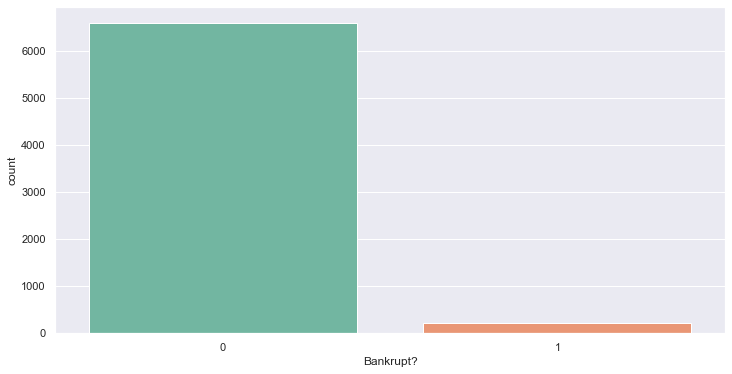

In [19]:
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.countplot(x='Bankrupt?',data=c_data, palette='Set2')
print(c_data['Bankrupt?'].value_counts())